In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

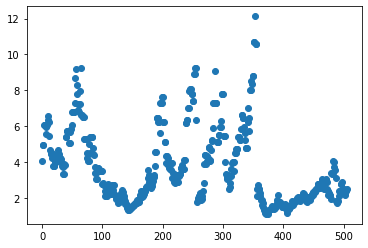

In [12]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

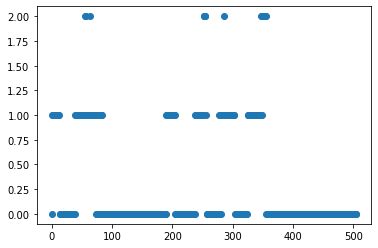

In [14]:
new_DIS, bins = pd.cut(df.DIS,bins=3, labels=[0,1,2], retbins=True)
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [16]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal width stratejisi kullanılmıştır. Sınır değerler arası mesafe eşit ve 3,67663023'tür.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Equal width stratejisi kullanılmıştır. Sınır değerler arası mesafe eşit ve 3,67663023'tür.


### Soru 

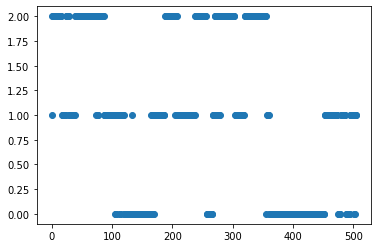

In [18]:
new_DIS, bins = pd.qcut(df.DIS,q=3, labels=[0,1,2], retbins=True)

x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [20]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal frequency stratejisi kullanılmıştır. Her sınır değerinden eşit miktarda alınmıştır (169).")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Equal frequency stratejisi kullanılmıştır. Her sınır değerinden eşit miktarda alınmıştır (169).


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [21]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df["ZN+INDUS"] = df.ZN + df.INDUS
df["ZN+INDUS"].head()

0    20.31
1     7.07
2     7.07
3     2.18
4     2.18
Name: ZN+INDUS, dtype: float64

In [23]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df["PTRATIO-CRIM"]=df.PTRATIO-df.CRIM
df["PTRATIO-CRIM"].head()

0    15.29368
1    17.77269
2    17.77271
3    18.66763
4    18.63095
Name: PTRATIO-CRIM, dtype: float64

In [25]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df["B/CRIM"]=df.B/df.CRIM
df["B/CRIM"].head()

0    62800.632911
1    14533.138045
2    14394.650055
3    12191.226444
4     5748.008689
Name: B/CRIM, dtype: float64

In [26]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df["DIS*NOX"]=df.DIS*df.NOX

sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [28]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
df_poly = df.copy()
from sklearn.preprocessing import PolynomialFeatures
pd.DataFrame(PolynomialFeatures().fit_transform(df_poly))

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,233.896648,0.000244,960452.783544,33.652519,2.535549e-10,1.0,0.000035,3.943919e+09,138187.768671,4.841848
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,315.868510,0.001223,258292.957195,41.402724,4.734577e-09,1.0,0.000160,2.112121e+08,33855.960941,5.426896
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,315.869221,0.001235,255831.940978,41.402770,4.826116e-09,1.0,0.000162,2.072060e+08,33533.343489,5.426896
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,348.480410,0.001531,227581.304507,51.830443,6.728298e-09,1.0,0.000228,1.486260e+08,33848.789051,7.708883
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,347.112298,0.003241,107090.862491,51.728602,3.026671e-08,1.0,0.000483,3.303960e+07,15959.274851,7.708883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,438.373463,0.003345,131043.264670,29.736044,2.552789e-08,1.0,0.000227,3.917285e+07,8889.015092,2.017075
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,439.100709,0.002390,183718.408151,27.466150,1.300945e-08,1.0,0.000150,7.686723e+07,11491.754225,1.718033
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,438.451772,0.003206,136780.519355,26.006065,2.343545e-08,1.0,0.000190,4.267040e+07,8112.917540,1.542508
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,436.409230,0.005819,75000.746551,28.595623,7.758232e-08,1.0,0.000381,1.288953e+07,4914.408066,1.873722


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [29]:
# python kodu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
mms= MinMaxScaler()
std = StandardScaler()
rbs = RobustScaler()

df_mms=mms.fit_transform(df)

sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [ ]:
# python kodu
df_std=std.fit_transform(df)

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [30]:
# python kodu
df_rbs=rbs.fit_transform(df)

# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


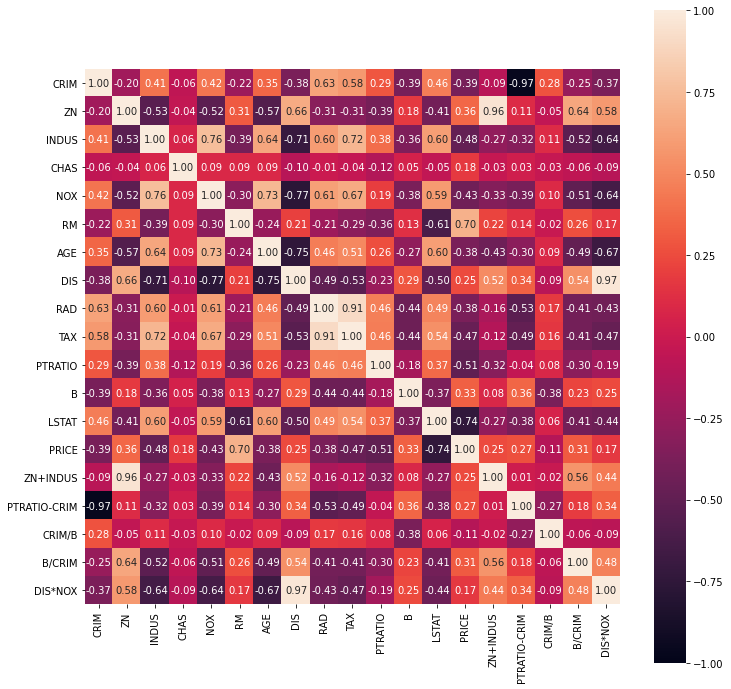

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

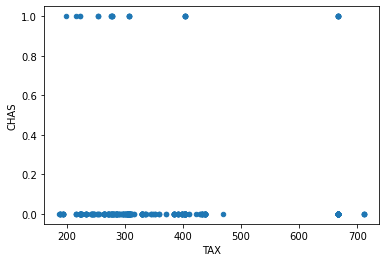

In [32]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

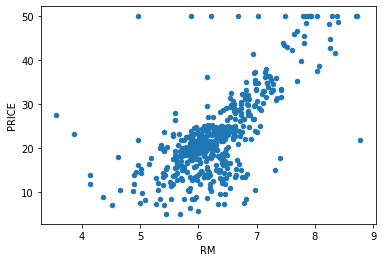

Tahmin edileceği üzere ortalama oda sayısı ile ev fiyatı beraber artıyor ve azalıyor.


In [33]:
# python kodu buraya
df.plot.scatter("RM","PRICE")
plt.show()

print("Tahmin edileceği üzere ortalama oda sayısı ile ev fiyatı beraber artıyor ve azalıyor.")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

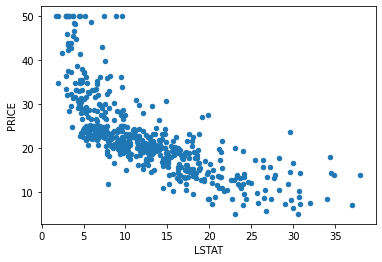

Nüfus yoğunluğu azaldıkça evin fiyatı artıyor.


In [34]:
# python kodu buraya
df.plot.scatter("LSTAT","PRICE")
plt.show()
print("Nüfus yoğunluğu azaldıkça evin fiyatı artıyor.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

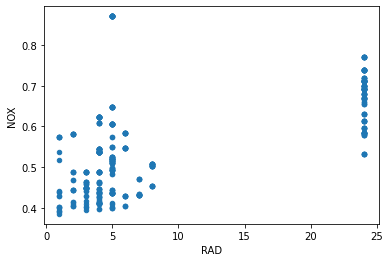

Otoyollara erişim imkanı ile nitrik oksit yoğunluğu düşük korelasyonlu değişkenlerdir.


In [37]:
# python kodu buraya
df.plot.scatter("RAD","NOX")
plt.show()
print("Otoyollara erişim imkanı ile nitrik oksit yoğunluğu düşük korelasyonlu değişkenlerdir.")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

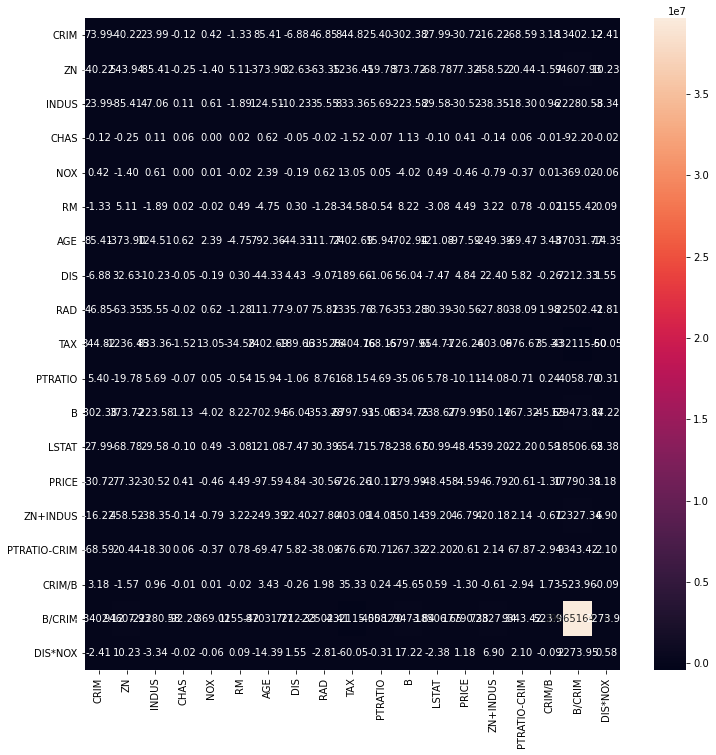

In [41]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), annot=True, fmt='.2f')
plt.show()
# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

<AxesSubplot:>

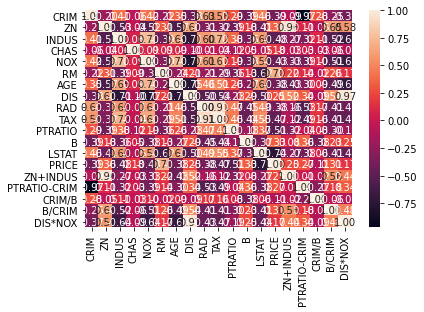

In [45]:
# Heatmap için python kodunu bu hücreye yazın
df_std=df.copy()
df_std=pd.DataFrame(std.fit_transform(df),columns=df.columns)
sns.heatmap(df_std.cov(), annot=True, fmt='.2f')
# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)